Explanatory Data Analysis
Exploratory Data Analysis (EDA) is the process of examining and analyzing datasets to summarize their main characteristics, often with the help of visualizations. It is typically the first step in data analysis, where analysts explore data patterns, detect anomalies, test assumptions, and check relationships between variables. EDA involves using descriptive statistics (like mean, median, variance) and graphical methods (such as histograms, box plots, scatter plots, and correlation heatmaps) to understand the structure of the data. The goal is not to confirm a hypothesis but to uncover insights, identify trends, and prepare the data for further modeling or decision-making.
Steps for an Exploratory Data Analysis (EDA) Project
1. Data Collection
Gather raw data from various sources like CSV/Excel files, APIs, or databases. Make sure the data aligns with the business problem and is comprehensive enough for analysis.
2. Data Cleaning
Prepare the dataset by addressing missing values, removing duplicates, and fixing inconsistencies in data formats. Standardize categories and deal with incorrect or extreme values so that the dataset becomes reliable.
3. Data Understanding
Explore the dataset to understand its structure. Check column data types, distinguish between numerical and categorical variables, and run sanity checks to ensure logical correctness (e.g., prices not being negative).
4. Univariate Analysis
Study each feature individually to understand its distribution and behavior. Use descriptive statistics and plots like histograms, boxplots, or frequency charts to gain insights about single variables.
5. Bivariate Analysis
Examine how two variables relate to each other. For instance, compare categorical variables with cross-tabulation, evaluate numeric vs. categorical data using grouped summaries, or assess correlations with scatter plots.
6. Multivariate Analysis
Look for interactions among multiple variables simultaneously. Use pivot tables, advanced visualizations like pairplots and heatmaps, and statistical techniques to identify deeper relationships.
7. Feature Engineering
Enhance the dataset by deriving new features such as ratios, time-based attributes, or aggregations. Convert categorical variables into numeric form (e.g., encoding) when preparing for machine learning models.
8. Outlier Detection
Identify unusual values that deviate significantly from the rest of the data. Assess whether they represent true anomalies or errors, and decide if they should be kept, adjusted, or removed.
9. Trend and Pattern Analysis
Look for underlying trends in the dataset, such as seasonality in time-series data or variations across categories like region or customer type. This helps uncover hidden insights.
10. Documentation & Reporting
Summarize findings clearly with visualizations, charts, and narrative explanations. Present actionable insights, highlight limitations of the data, and provide recommendations for next steps.


Import the necessary libraries

In [2]:
#remove warning message
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

Import dataset

In [3]:
df=pd.read_csv("C:\datascience\PROJECT\credit.csv")

Display the first 5 rows of the dataset

In [4]:
print(df.tail())

    checking_balance  months_loan_duration credit_history  \
995          unknown                    12           good   
996           < 0 DM                    30           good   
997          unknown                    12           good   
998           < 0 DM                    45           good   
999       1 - 200 DM                    45       critical   

                  purpose  amount savings_balance employment_duration  \
995  furniture/appliances    1736        < 100 DM         4 - 7 years   
996                   car    3857        < 100 DM         1 - 4 years   
997  furniture/appliances     804        < 100 DM           > 7 years   
998  furniture/appliances    1845        < 100 DM         1 - 4 years   
999                   car    4576    100 - 500 DM          unemployed   

     percent_of_income  years_at_residence  age other_credit housing  \
995                  3                   4   31         none     own   
996                  4                   4   40   

Data cleaning

In [5]:
#check whether there are any missing values
print(df.isna().sum())

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64


In [6]:
#remove spaces from column names
df.colums=df.columns.str.replace('','_')

In [7]:
#check duplicate rows
df.duplicated().sum()

0

In [8]:
#basic informaation about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [9]:
#use summary statistics to undertand distributions
print(df.describe())

       months_loan_duration        amount  percent_of_income  \
count           1000.000000   1000.000000        1000.000000   
mean              20.903000   3271.258000           2.973000   
std               12.058814   2822.736876           1.118715   
min                4.000000    250.000000           1.000000   
25%               12.000000   1365.500000           2.000000   
50%               18.000000   2319.500000           3.000000   
75%               24.000000   3972.250000           4.000000   
max               72.000000  18424.000000           4.000000   

       years_at_residence          age  existing_loans_count   dependents  
count         1000.000000  1000.000000           1000.000000  1000.000000  
mean             2.845000    35.546000              1.407000     1.155000  
std              1.103718    11.375469              0.577654     0.362086  
min              1.000000    19.000000              1.000000     1.000000  
25%              2.000000    27.000000     

1. Distribution of Loan Amounts

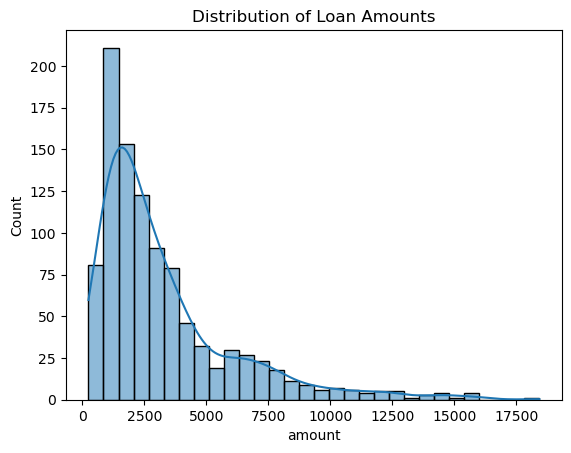

In [10]:
sns.histplot(df['amount'], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.show()


2. Loan Duration vs Default

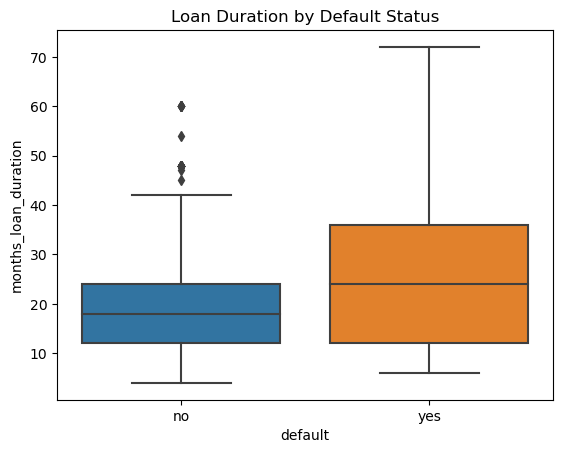

In [18]:
sns.boxplot(x='default',y='months_loan_duration',data=df)
plt.title("Loan Duration by Default Status")
plt.show()

3. Age Distribution of Applicants

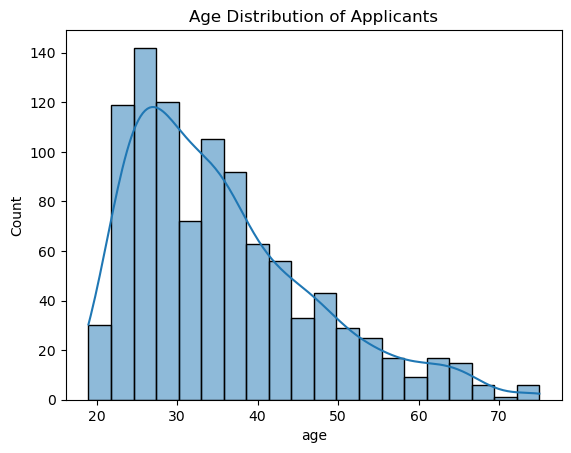

In [19]:
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Age Distribution of Applicants')
plt.show()

4. Default Rate by Checking Balance

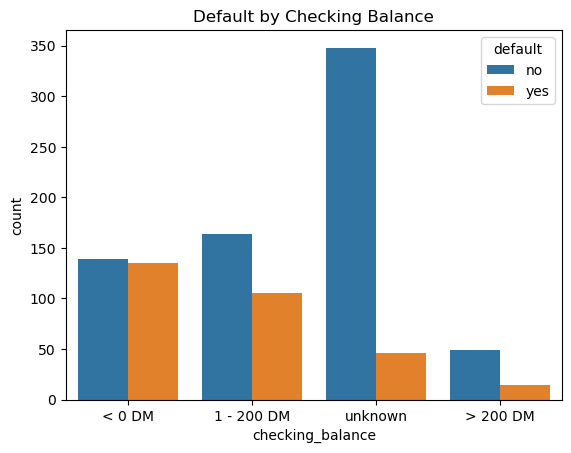

In [20]:
sns.countplot(x='checking_balance',hue='default',data=df)
plt.title("Default by Checking Balance")
plt.show()

5. Default Rate by Savings Balance

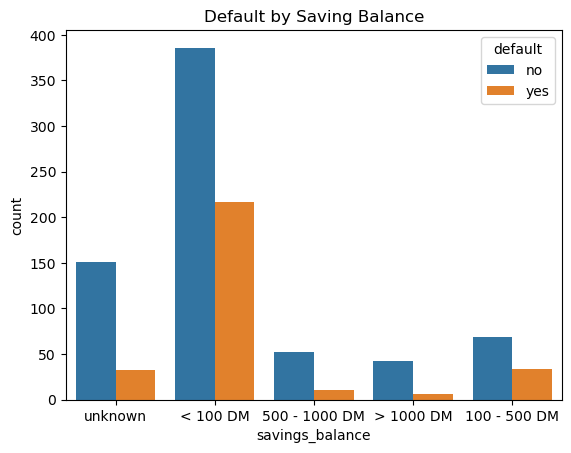

In [21]:
sns.countplot(x='savings_balance',hue='default',data=df)
plt.title("Default by Saving Balance")
plt.show()

6. Employment Duration vs Default

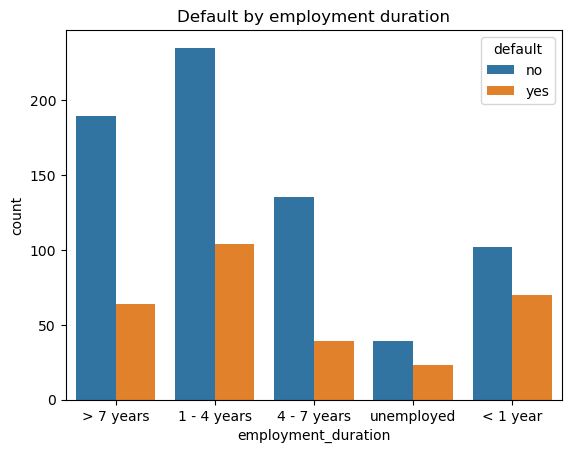

In [30]:
sns.countplot(x='employment_duration',hue='default',data=df)
plt.title("Default by employment duration")
plt.show()

7.Loan Purpose Analysis: Most common purposes


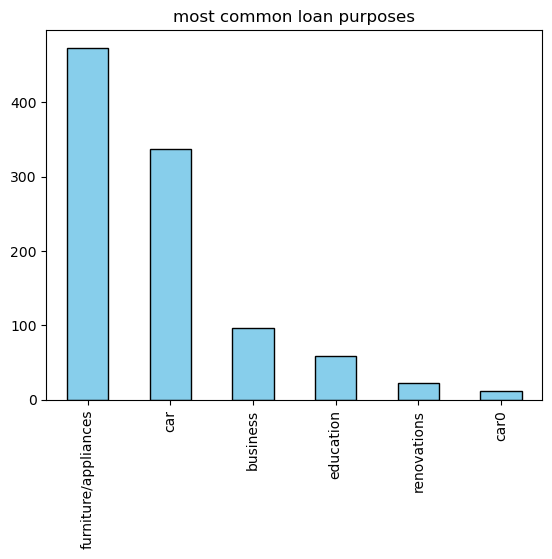

In [37]:
df['purpose'].value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("most common loan purposes")
plt.show()

Default by purpose:

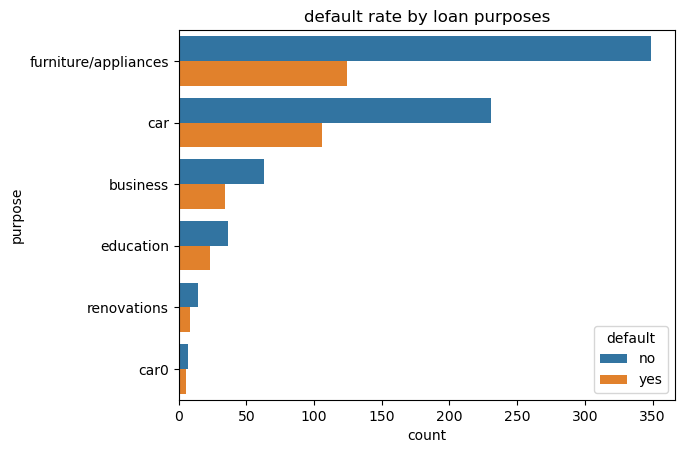

In [41]:
sns.countplot(y='purpose',hue='default',data=df,order=df['purpose'].value_counts().index)
plt.title("default rate by loan purposes")
plt.show()

8. Housing Type vs Default

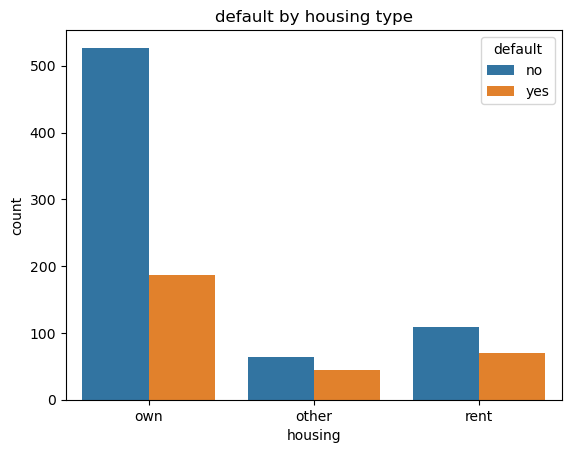

In [43]:
sns.countplot(x='housing',hue='default',data=df)
plt.title("default by housing type")
plt.show()

9.Job Type vs Default

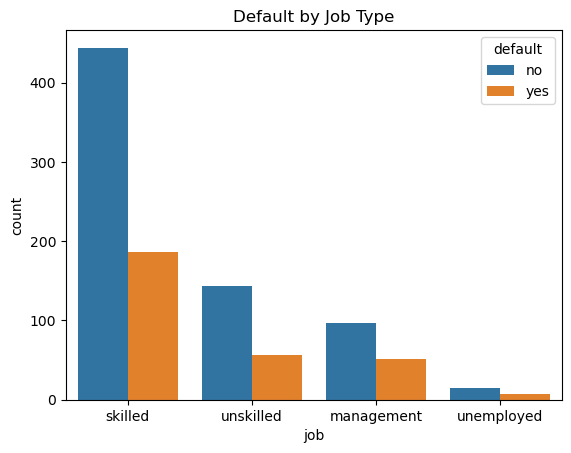

In [65]:
sns.countplot(x='job', hue='default', data=df)
plt.title("Default by Job Type")
plt.show()


11.Dependents & Phone Ownership vs Default

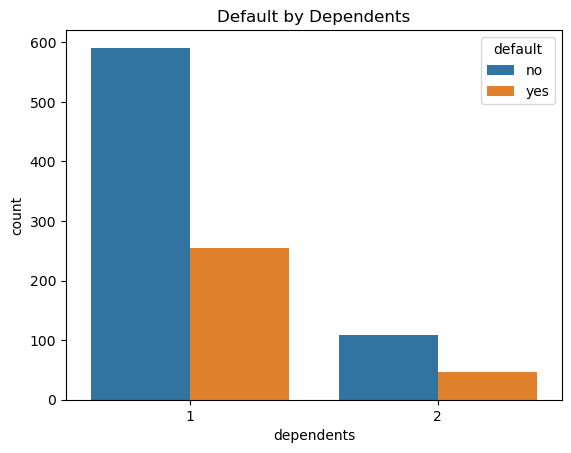

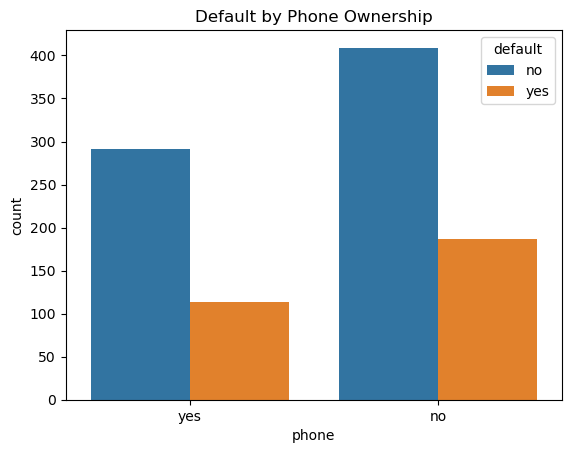

In [70]:
sns.countplot(x='dependents', hue='default', data=df)
plt.title("Default by Dependents")
plt.show()

sns.countplot(x='phone', hue='default', data=df)
plt.title("Default by Phone Ownership")
plt.show()


9.Correlation Among Numeric Features

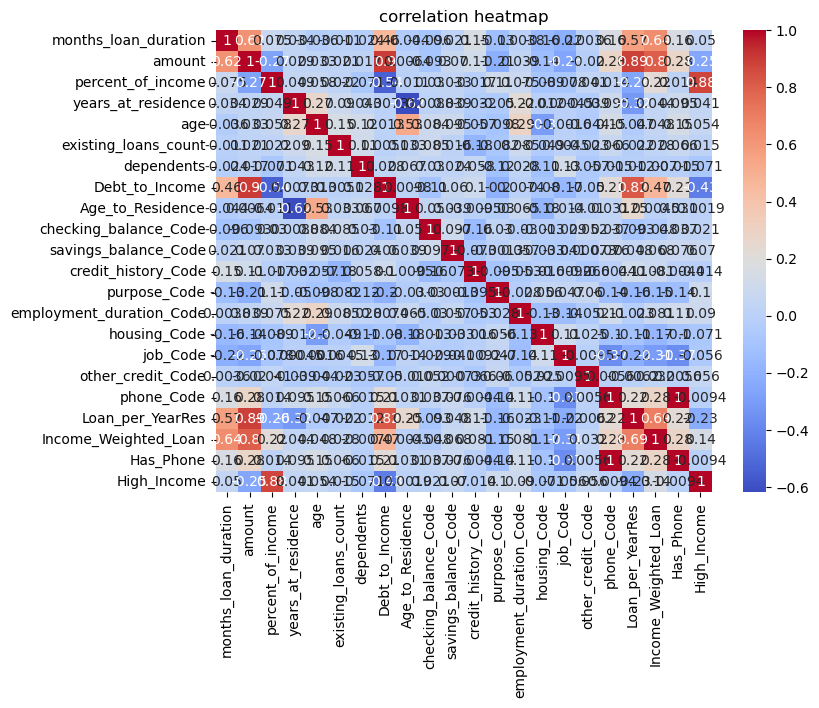

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

10.Average Balance vs Default

default
no     2985.457143
yes    3938.126667
Name: amount, dtype: float64


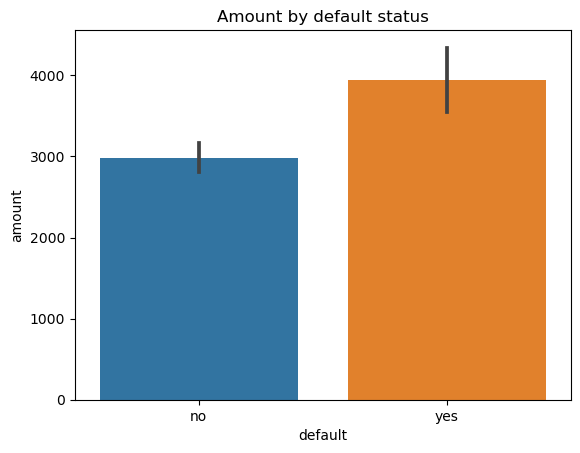

In [76]:
print(df.groupby('default')['amount'].mean())
sns.barplot(x='default',y='amount',data=df)
plt.title('Amount by default status')
plt.show()

11.Feature Engineering
What is the Debt_to_Income ratio for customers who default vs. those who do not?

In [77]:
df['Debt_to_Income'] = df['amount'] / (df['percent_of_income'] + 1)
print(df.head())

  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age  ... purpose_Code employment_duration_Code  \
0                   4   67  ...

12.Feature Engineering
Into which age groups can we segment our customers for analysis?

In [78]:
df['Age_Bin'] = pd.cut(df['age'],
                       bins=[18,25,35,45,55,65,120],
                       labels=['18–25','26–35','36–45','46–55','56–65','65+'])

print(df.head())

  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age  ... purpose_Code employment_duration_Code  \
0                   4   67  ...

Suggestions & Recommendations
1. Strengthen Credit Screening Based on Account Balances

Observation: Applicants with low/negative checking balances and minimal savings showed significantly higher default rates.
Recommendation:

Give higher creditworthiness weight to applicants maintaining stable balances.

Set stricter approval thresholds for those with poor account balances.

Encourage customers to build a minimum savings buffer before applying for loans.

2. Monitor Loan Purpose and Amount

Observation: Certain loan purposes (e.g., personal consumption, small cash loans) recorded higher default risk, especially when combined with larger loan amounts.
Recommendation:

Implement differentiated risk scoring based on loan purpose.

Limit loan amounts for high-risk categories while allowing flexibility in safer purposes (e.g., education, car).

Introduce tailored repayment plans for high-value, high-risk purposes.

3. Employment Stability and Housing Type

Observation: Applicants with shorter employment duration and those living in rented housing had a higher probability of default.
Recommendation:

Factor in job stability and housing ownership in risk assessment models.

Provide incentives or lower interest rates for applicants with stable employment and owned housing.

For higher-risk groups, require additional guarantors or collateral.

4. Age and Demographic Insights

Observation: Younger applicants (<25 years) and very old applicants showed a slightly higher tendency to default compared to middle-aged borrowers.
Recommendation:

Introduce financial literacy sessions for younger borrowers.

Design specialized products for senior borrowers with stricter eligibility conditions.

Include age-based adjustments in risk scoring systems.

5. Enhance Risk-Based Pricing and Monitoring

Observation: Longer loan durations and higher debt-to-income ratios were closely linked with defaults.
Recommendation:

Apply risk-based interest rates for applicants with high debt burdens.

Set caps on maximum loan durations for vulnerable applicants.

Use periodic monitoring of repayment behavior to flag early warning signals.

Conclusion

The exploratory analysis of the credit dataset provided valuable insights into the financial and demographic factors influencing loan default risk. Key findings indicate that applicants with low or negative checking balances, limited savings, and longer loan durations are more prone to default. Certain loan purposes, such as personal consumption, showed higher default rates compared to secured purposes like education or car loans. Employment stability and housing ownership also emerged as important differentiators in repayment behavior.

 Correlation analysis revealed meaningful relationships between variables such as loan amount, loan duration, and percentage of income, which directly affect repayment capacity.

Overall, the analysis underscores the importance of considering both financial strength (balances, income ratio) and demographic factors (age, employment, dependents) when assessing creditworthiness. These findings can guide lenders in refining their risk assessment models, improving approval decisions, and reducing potential loan defaults.

The next logical step would be to extend this analysis into predictive modeling (e.g., logistic regression, decision trees, or machine learning techniques) to build a robust credit scoring system that can proactively flag high-risk applicants.